# Avaliação 2 - Sistema Fuzzy para Controle de Carga de Servidores

Em ambientes de computação em nuvem e data centers, é essencial distribuir
adequadamente a carga entre servidores para evitar sobrecarga e otimizar o desempenho.
Este projeto utiliza lógica fuzzy para tomar decisões inteligentes sobre quando adicionar,
remover ou redistribuir servidores com base em métricas de uso de CPU e taxa de requisições.

## Requisitos
1. Implementação do sistema fuzzy (código Python)
1. Testes com diferentes cenários (gráficos de pertinência e simulações)
1. Relatório técnico (explicação das regras fuzzy e análise dos resultados)

## Implementação
### Definir Variáveis de Entrada e Saída
- Entradas:

    uso_cpu (0% a 100%) → Mede a carga atual do servidor.
  
    taxa_requisicoes (0 a 1000 req/s) → Quantidade de requisições por segundo.
- Saída:

    acao_servidor (0 a 100%) → Define se deve adicionar, manter ou remover servidores.

In [7]:
pip install -U scikit-fuzzy networkx

Note: you may need to restart the kernel to use updated packages.Collecting networkx
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 20.2 MB/s eta 0:00:00




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
# Imports basicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definição das Variáveis de Controle e Funções de Pertinência/Relacionamento

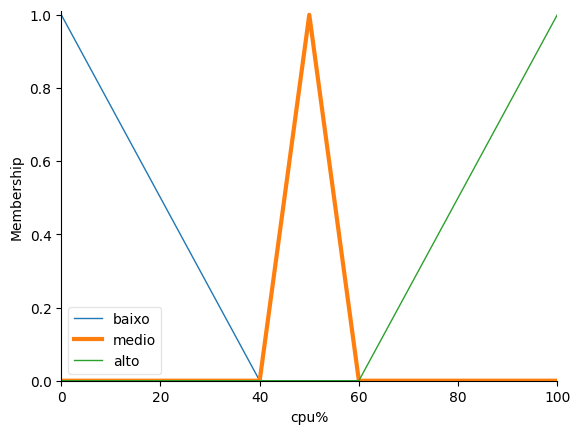

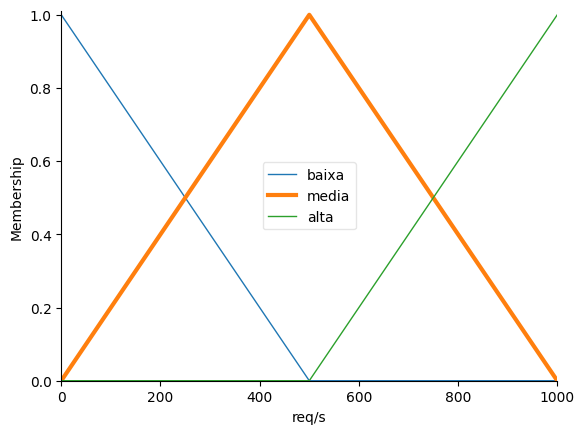

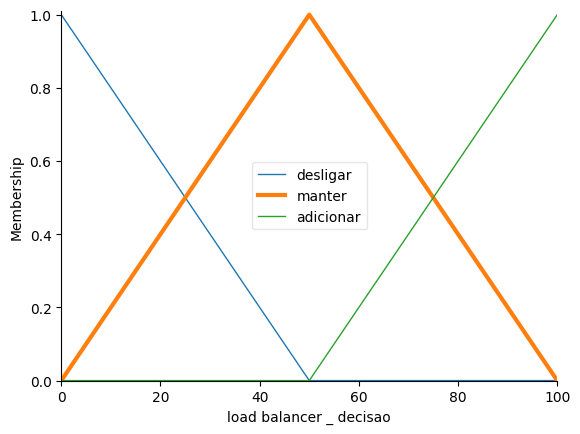

In [90]:
# Variaveis de controle i/o

uso_cpu = ctrl.Antecedent(np.arange(0, 101, 1), 'cpu%')
taxa_requisicoes = ctrl.Antecedent(np.arange(0, 1001, 1), 'req/s')

acao_servidor = ctrl.Consequent(np.arange(0, 101, 1), 'load balancer _ decisao')

uso_cpu['baixo'] = fuzz.trimf(uso_cpu.universe, [0, 0, 40])
uso_cpu['medio'] = fuzz.trimf(uso_cpu.universe, [40, 50, 60])
uso_cpu['alto'] = fuzz.trimf(uso_cpu.universe, [60, 100, 100])
uso_cpu['medio'].view()

taxa_requisicoes['baixa'] = fuzz.trimf(taxa_requisicoes.universe, [0, 0, 500])
taxa_requisicoes['media'] = fuzz.trimf(taxa_requisicoes.universe, [0, 500, 1000])
taxa_requisicoes['alta'] = fuzz.trimf(taxa_requisicoes.universe, [500, 1000, 1000])
taxa_requisicoes['media'].view()

acao_servidor['desligar'] = fuzz.trimf(acao_servidor.universe, [0, 0, 50])
acao_servidor['manter'] = fuzz.trimf(acao_servidor.universe, [0, 50, 100])
acao_servidor['adicionar'] = fuzz.trimf(acao_servidor.universe, [50, 100, 100])
acao_servidor['manter'].view()

# Definição das Regras Fuzzy

In [105]:
regra_adicionar_servidor = ctrl.Rule(uso_cpu['alto'] | taxa_requisicoes['alta'], acao_servidor['adicionar'])

regra_adicionar_servidor2 = ctrl.Rule(uso_cpu['alto'] | taxa_requisicoes['baixa'], acao_servidor['manter'])

regra_manter_servidor = ctrl.Rule(uso_cpu['medio'] | taxa_requisicoes['media'], acao_servidor['manter'])

regra_remover_servidor = ctrl.Rule(uso_cpu['baixo'] | taxa_requisicoes['baixa'], acao_servidor['desligar'])

controle_servidor = ctrl.ControlSystem([regra_adicionar_servidor, regra_adicionar_servidor2, regra_manter_servidor, regra_remover_servidor])

# Simulação do Sistema de Controle

Resultado da decisão: 43.40934523322145


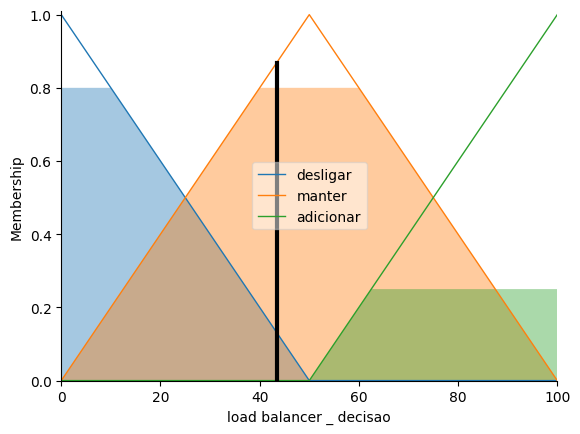

In [106]:
# Simulação inicial
load_balancer = ctrl.ControlSystemSimulation(controle_servidor)

load_balancer.input['cpu%'] = 70
load_balancer.input['req/s'] = 100

load_balancer.compute()

print(f'Resultado da decisão: {load_balancer.output['load balancer _ decisao']}')

acao_servidor.view(sim=load_balancer)